In [1]:
import yaml

In [2]:
from src.loaders import gather_collections, get_loaders

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np

In [4]:
with open('training_configs/dataset/eyes.yaml') as f:
    dtcfg = yaml.safe_load(f)

## First dataset test

In [5]:
gathered_data = gather_collections(dtcfg['gatherers'])
gathered_data

{'train': [('/mnt/HD-LSDF/Medaka/segmentations/workshop/proper_images/513.tif',
   '/mnt/HD-LSDF/Medaka/segmentations/workshop/eyes_to_train/04-513.nii'),
  ('/mnt/HD-LSDF/Medaka/segmentations/workshop/proper_images/675.tif',
   '/mnt/HD-LSDF/Medaka/segmentations/workshop/eyes_to_train/22-675.nii'),
  ('/mnt/HD-LSDF/Medaka/segmentations/workshop/proper_images/677.tif',
   '/mnt/HD-LSDF/Medaka/segmentations/workshop/eyes_to_train/13-677.nii'),
  ('/mnt/HD-LSDF/Medaka/segmentations/workshop/proper_images/803.tif',
   '/mnt/HD-LSDF/Medaka/segmentations/workshop/eyes_to_train/15-803.nii'),
  ('/mnt/HD-LSDF/Medaka/segmentations/workshop/proper_images/833.tif',
   '/mnt/HD-LSDF/Medaka/segmentations/workshop/eyes_to_train/21-833.nii'),
  ('/mnt/HD-LSDF/Medaka/segmentations/workshop/proper_images/511.tif',
   '/mnt/HD-LSDF/Medaka/segmentations/workshop/eyes_to_train/12-511.nii'),
  ('/mnt/HD-LSDF/Medaka/segmentations/workshop/proper_images/508.tif',
   '/mnt/HD-LSDF/Medaka/segmentations/worksh

In [6]:
%%time
loaders_in_loop, loaders_post_loop = get_loaders(dtcfg['datasets'], gathered_data)

CPU times: user 4min 1s, sys: 1min 6s, total: 5min 8s
Wall time: 5min 19s


In [8]:
print(loaders_in_loop, loaders_post_loop)
print(loaders_in_loop['train'].batch_size, loaders_in_loop['valid'].batch_size)

{'train': <torch.utils.data.dataloader.DataLoader object at 0x7f45643c4dc0>, 'valid': <torch.utils.data.dataloader.DataLoader object at 0x7f45643da040>} {}
64 256


In [9]:
%%time
batch_train = next(iter(loaders_in_loop['train']))
batch_valid = next(iter(loaders_in_loop['valid']))

CPU times: user 5.57 s, sys: 7.92 s, total: 13.5 s
Wall time: 19.9 s


torch.Size([64, 1, 256, 256]) torch.Size([256, 1, 512, 512])
0.953125 0.22265625


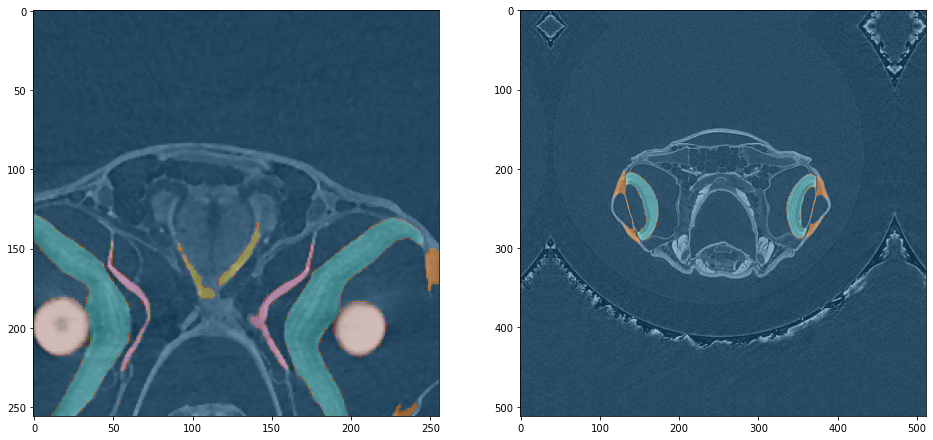

In [10]:
print(batch_train[0].shape, batch_valid[0].shape)
print((batch_train[1].sum((1, 2, 3)) > 0).detach().numpy().mean(), 
      (batch_valid[1].sum((1, 2, 3)) > 0).detach().numpy().mean())

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 10))

train_id = np.argmax(batch_train[1].sum((1, 2, 3)) > 0)
ax1.imshow(batch_train[0][train_id, 0].detach().cpu().numpy(), cmap='gray')
ax1.imshow(batch_train[1][train_id, 0].detach().cpu().numpy(), cmap='tab10', alpha=0.4)

valid_id = np.argmax(batch_valid[1].sum((1, 2, 3)) > 0)
ax2.imshow(batch_valid[0][valid_id, 0].detach().cpu().numpy(), cmap='gray')
ax2.imshow(batch_valid[1][valid_id, 0].detach().cpu().numpy(), cmap='tab10', alpha=0.4)

plt.show()

## Second dataset test

In [24]:
with open('training_configs/dataset/tumor_biomedisa.yaml') as f:
    dtcfg = yaml.safe_load(f)

In [12]:
gathered_data = gather_collections(dtcfg['gatherers'])
gathered_data

{'train': [('/mnt/data/decathlon/Task01_BrainTumour/train/volumes/BRATS_045.tif',
   '/mnt/data/decathlon/Task01_BrainTumour/train/labels_biomedisa/BRATS_045.tif'),
  ('/mnt/data/decathlon/Task01_BrainTumour/train/volumes/BRATS_199.tif',
   '/mnt/data/decathlon/Task01_BrainTumour/train/labels_biomedisa/BRATS_199.tif'),
  ('/mnt/data/decathlon/Task01_BrainTumour/train/volumes/BRATS_304.tif',
   '/mnt/data/decathlon/Task01_BrainTumour/train/labels_biomedisa/BRATS_304.tif'),
  ('/mnt/data/decathlon/Task01_BrainTumour/train/volumes/BRATS_387.tif',
   '/mnt/data/decathlon/Task01_BrainTumour/train/labels_biomedisa/BRATS_387.tif'),
  ('/mnt/data/decathlon/Task01_BrainTumour/train/volumes/BRATS_156.tif',
   '/mnt/data/decathlon/Task01_BrainTumour/train/labels_biomedisa/BRATS_156.tif'),
  ('/mnt/data/decathlon/Task01_BrainTumour/train/volumes/BRATS_433.tif',
   '/mnt/data/decathlon/Task01_BrainTumour/train/labels_biomedisa/BRATS_433.tif'),
  ('/mnt/data/decathlon/Task01_BrainTumour/train/volume

In [13]:
%%time
loaders_in_loop, loaders_post_loop = get_loaders(dtcfg['datasets'], gathered_data)

CPU times: user 1min 4s, sys: 22.1 s, total: 1min 26s
Wall time: 1min


In [14]:
print(loaders_in_loop, loaders_post_loop)
print(loaders_in_loop['train'].batch_size, loaders_in_loop['valid'].batch_size)

{'train': <torch.utils.data.dataloader.DataLoader object at 0x7f44656e84f0>, 'valid': <torch.utils.data.dataloader.DataLoader object at 0x7f4465847910>} {'test': <torch.utils.data.dataloader.DataLoader object at 0x7f44659013d0>}
64 256


In [21]:
%%time
batch_train = next(iter(loaders_in_loop['train']))
batch_valid = next(iter(loaders_in_loop['valid']))
batch_test = next(iter(loaders_post_loop['test']))

CPU times: user 509 ms, sys: 7.87 s, total: 8.38 s
Wall time: 9.85 s


torch.Size([64, 1, 256, 256]) torch.Size([256, 1, 256, 256])
0.765625 0.4921875


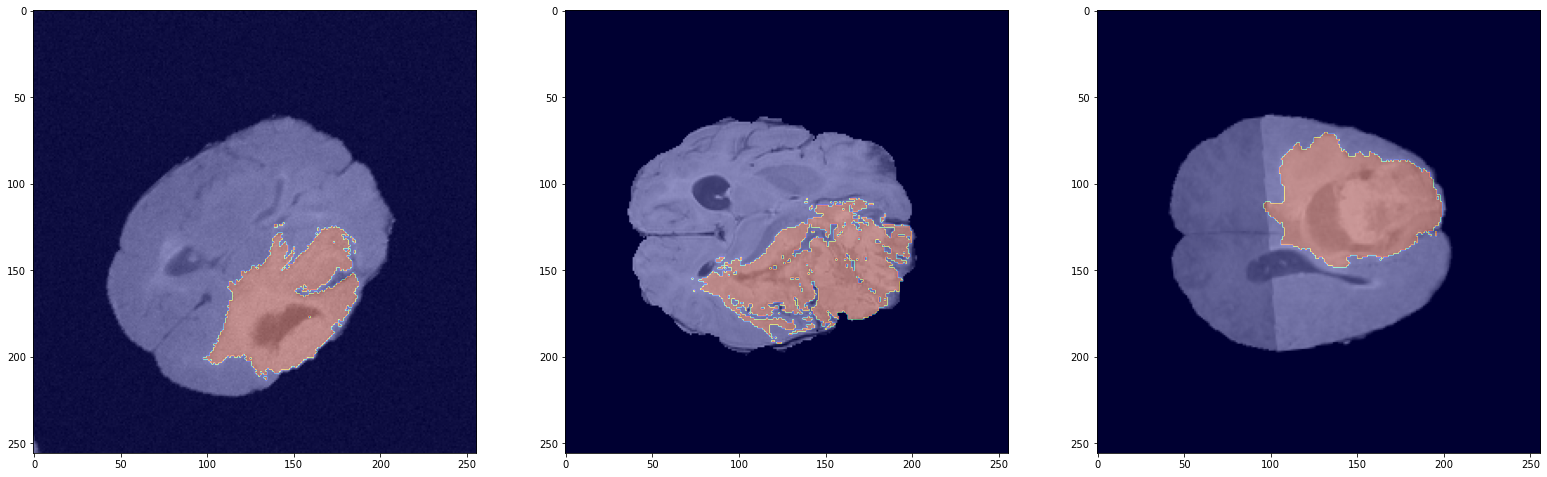

In [22]:
print(batch_train[0].shape, batch_valid[0].shape)
print((batch_train[1].sum((1, 2, 3)) > 0).detach().numpy().mean(), 
      (batch_valid[1].sum((1, 2, 3)) > 0).detach().numpy().mean())

fig, (ax1, ax2 ,ax3) = plt.subplots(ncols=3, figsize=(27, 10))

train_id = np.argmax(batch_train[1].sum((1, 2, 3)))
ax1.imshow(batch_train[0][train_id, 0].detach().cpu().numpy(), cmap='gray')
ax1.imshow(batch_train[1][train_id, 0].detach().cpu().numpy(), cmap='jet', alpha=0.4)

valid_id = np.argmax(batch_valid[1].sum((1, 2, 3)))
ax2.imshow(batch_valid[0][valid_id, 0].detach().cpu().numpy(), cmap='gray')
ax2.imshow(batch_valid[1][valid_id, 0].detach().cpu().numpy(), cmap='jet', alpha=0.4)

test_id = np.argmax(batch_test[1].sum((1, 2, 3)))
ax3.imshow(batch_test[0][test_id, 0].detach().cpu().numpy(), cmap='gray')
ax3.imshow(batch_test[1][test_id, 0].detach().cpu().numpy(), cmap='jet', alpha=0.4)

plt.show()

## Third dataset test

In [25]:
with open('training_configs/dataset/tumor_nearest.yaml') as f:
    dtcfg = yaml.safe_load(f)

In [26]:
gathered_data = gather_collections(dtcfg['gatherers'])
gathered_data

{'train': [('/mnt/data/decathlon/Task01_BrainTumour/train/volumes/BRATS_045.tif',
   '/mnt/data/decathlon/Task01_BrainTumour/train/labels_nearest/BRATS_045.tif'),
  ('/mnt/data/decathlon/Task01_BrainTumour/train/volumes/BRATS_199.tif',
   '/mnt/data/decathlon/Task01_BrainTumour/train/labels_nearest/BRATS_199.tif'),
  ('/mnt/data/decathlon/Task01_BrainTumour/train/volumes/BRATS_304.tif',
   '/mnt/data/decathlon/Task01_BrainTumour/train/labels_nearest/BRATS_304.tif'),
  ('/mnt/data/decathlon/Task01_BrainTumour/train/volumes/BRATS_387.tif',
   '/mnt/data/decathlon/Task01_BrainTumour/train/labels_nearest/BRATS_387.tif'),
  ('/mnt/data/decathlon/Task01_BrainTumour/train/volumes/BRATS_156.tif',
   '/mnt/data/decathlon/Task01_BrainTumour/train/labels_nearest/BRATS_156.tif'),
  ('/mnt/data/decathlon/Task01_BrainTumour/train/volumes/BRATS_433.tif',
   '/mnt/data/decathlon/Task01_BrainTumour/train/labels_nearest/BRATS_433.tif'),
  ('/mnt/data/decathlon/Task01_BrainTumour/train/volumes/BRATS_042.

In [27]:
%%time
loaders_in_loop, loaders_post_loop = get_loaders(dtcfg['datasets'], gathered_data)

CPU times: user 10.6 s, sys: 4.25 s, total: 14.8 s
Wall time: 14.8 s


In [28]:
print(loaders_in_loop, loaders_post_loop)
print(loaders_in_loop['train'].batch_size, loaders_in_loop['valid'].batch_size)

{'train': <torch.utils.data.dataloader.DataLoader object at 0x7f45627e7e80>, 'valid': <torch.utils.data.dataloader.DataLoader object at 0x7f45632b0a30>} {'test': <torch.utils.data.dataloader.DataLoader object at 0x7f45627c5b80>}
64 256


In [29]:
%%time
batch_train = next(iter(loaders_in_loop['train']))
batch_valid = next(iter(loaders_in_loop['valid']))
batch_test = next(iter(loaders_post_loop['test']))

CPU times: user 561 ms, sys: 9.72 s, total: 10.3 s
Wall time: 11.1 s


torch.Size([64, 1, 256, 256]) torch.Size([256, 1, 256, 256])
0.84375 0.48046875


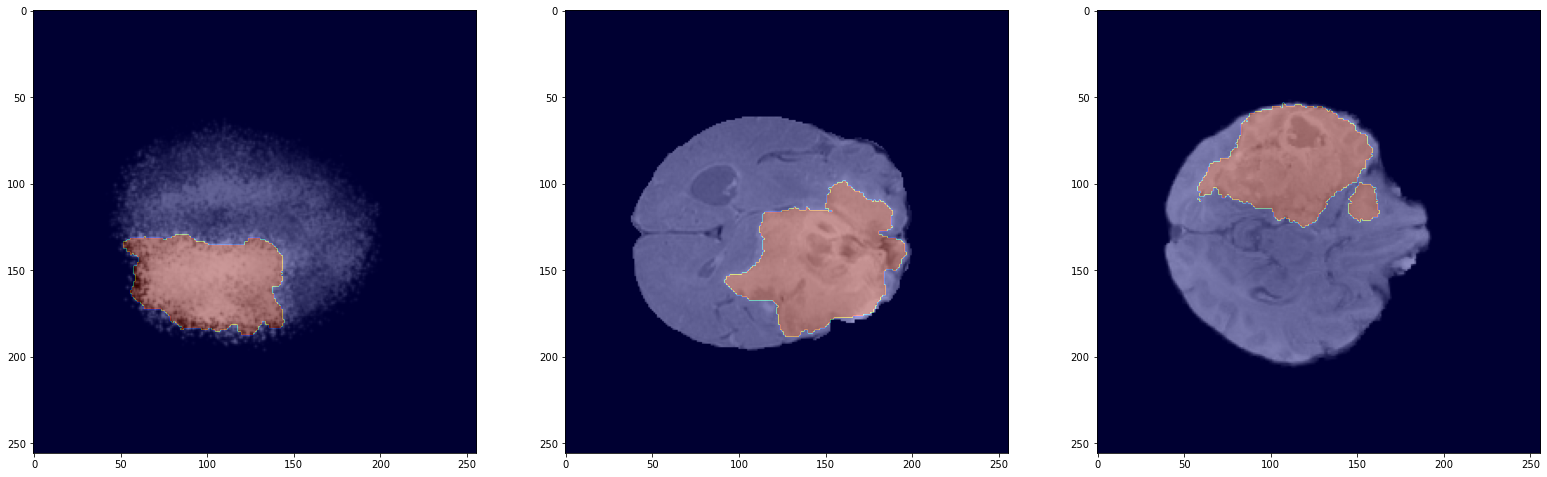

In [30]:
print(batch_train[0].shape, batch_valid[0].shape)
print((batch_train[1].sum((1, 2, 3)) > 0).detach().numpy().mean(), 
      (batch_valid[1].sum((1, 2, 3)) > 0).detach().numpy().mean())

fig, (ax1, ax2 ,ax3) = plt.subplots(ncols=3, figsize=(27, 10))

train_id = np.argmax(batch_train[1].sum((1, 2, 3)))
ax1.imshow(batch_train[0][train_id, 0].detach().cpu().numpy(), cmap='gray')
ax1.imshow(batch_train[1][train_id, 0].detach().cpu().numpy(), cmap='jet', alpha=0.4)

valid_id = np.argmax(batch_valid[1].sum((1, 2, 3)))
ax2.imshow(batch_valid[0][valid_id, 0].detach().cpu().numpy(), cmap='gray')
ax2.imshow(batch_valid[1][valid_id, 0].detach().cpu().numpy(), cmap='jet', alpha=0.4)

test_id = np.argmax(batch_test[1].sum((1, 2, 3)))
ax3.imshow(batch_test[0][test_id, 0].detach().cpu().numpy(), cmap='gray')
ax3.imshow(batch_test[1][test_id, 0].detach().cpu().numpy(), cmap='jet', alpha=0.4)

plt.show()